# WeatherPy - A Random sampling of weather across 500 points on the globe

### These are the trends of analysis from the plots:

<table>
<tr><th>Serial #</th><th>Observation</th></tr>
<tr><td>1</td><td>The temperatures vary parabolically from North pole to the South pole being at the peak near the equator.</td></tr>
<tr><td>2</td><td>The temparatures in the Northern Hemisphere towards the North pole are lower than those in the Southern hemisphere nearer to the South pole as it is winter here and summer in the southern hemisphere. </td></tr>
<tr><td>3</td><td>The wind speeds increase as you get closer to the poles</td></tr>
</table>

#### Import the main libraries to get points across the globe

In [1]:
##Import all necessary libraries
from citipy import citipy

import numpy as np

import pandas as pd

import requests

import json

from pprint import pprint

#### Generate 500 random coordinates across the globe - Latitude between -90 and 90, Longitude between -180 and 180

In [2]:
##Generate 500 unique cities and store their lat and long
cityData = {}
dupcities = 0
while(len(cityData.keys()) <500):
    latmultiplier = np.random.choice([90,-90])
    lat = latmultiplier * np.random.ranf()
    longmultipler = np.random.choice([180,-180])
    lng = longmultipler*np.random.ranf()
    city = citipy.nearest_city(lat,lng)
    if(city.city_name in cityData.keys()):
        dupcities = dupcities+1
    cityData[city.city_name] = {"lat":lat,"long":lng}
    

citynames = cityData.keys()




#### Create the base URL to query OpenWeatherMap

In [3]:
#Build the base URL for querying
url = "http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial"

#### Create a method to extract the data we are interested in

In [4]:
# Method to extract weather data we are interested in
def extractWeatherData(jsondata):
    weatherdata = {}
    weatherdata["lat"] = jsondata["coord"]["lat"]
    weatherdata["lon"] = jsondata["coord"]["lon"]
    weatherdata["temp"] = jsondata["main"]["temp"]
    weatherdata["humidity"] = jsondata["main"]["humidity"]
    weatherdata["cloudiness"] = jsondata["clouds"]["all"]
    weatherdata["windspeed"] = jsondata["wind"]["speed"]
    return weatherdata

#### Start querying for the city data we have. If city name fails, use just lat and long to query. Log the queries as they happen

In [6]:
#Query open weather API for weather data
#Create a dictionary of the data
#First query by name and if that fails use lat and long

extractedweatherdata = {}
index = 1
print("--------------------------------------------------------------------------------------------")
print("Beginning data retrieval")
print("--------------------------------------------------------------------------------------------")
for city in cityData.keys():
    requrl = url+"&q="+city+"&lat="+str(cityData[city]["lat"])  +"&lon="+str(cityData[city]["long"])
    print("Processing Record " + str(index) + " of Set 1 | " + city)
    index = index+1
    print(requrl)
    try:
        jsonData = requests.get(requrl).json()
        extractedweatherdata[city] = extractWeatherData(jsonData)
    except KeyError:
        print(f"Unable to get {city} data by name using lat and long instead")
        requrl = url+"&lat="+str(cityData[city]["lat"])  +"&lon="+str(cityData[city]["long"])
        print("Processing Record " + str(index-1) + " using lat and long of Set 1 | " + city)
        jsonData = requests.get(requrl).json()
        extractedweatherdata[city] = extractWeatherData(jsonData)

print("--------------------------------------------------------------------------------------------")
print("Data retrieval complete")
print("--------------------------------------------------------------------------------------------")

--------------------------------------------------------------------------------------------
Beginning data retrieval
--------------------------------------------------------------------------------------------
Processing Record 1 of Set 1 | hilo
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=hilo&lat=21.264214362&lon=-143.380629157
Processing Record 2 of Set 1 | plouzane
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=plouzane&lat=48.2524271847&lon=-4.91222674236
Processing Record 3 of Set 1 | port-cartier
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=port-cartier&lat=55.5485799654&lon=-68.8710427569
Processing Record 4 of Set 1 | ilulissat
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=ilulissat&lat=78.5598976324&lon=-43.8651537129
Processing Record 5 of Set 1 | f

Unable to get saleaula data by name using lat and long instead
Processing Record 40 using lat and long of Set 1 | saleaula
Processing Record 41 of Set 1 | talawdi
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=talawdi&lat=10.2006766874&lon=30.9158428908
Unable to get talawdi data by name using lat and long instead
Processing Record 41 using lat and long of Set 1 | talawdi
Processing Record 42 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=ushuaia&lat=-86.2916263529&lon=-56.8756273212
Processing Record 43 of Set 1 | sitka
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=sitka&lat=55.2977141772&lon=-140.930562116
Processing Record 44 of Set 1 | port moresby
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=port moresby&lat=-10.665260468&lon=145.695226759

Unable to get yanchukan data by name using lat and long instead
Processing Record 85 using lat and long of Set 1 | yanchukan
Processing Record 86 of Set 1 | karpathos
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=karpathos&lat=33.5324106577&lon=28.5512921653
Processing Record 87 of Set 1 | west plains
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=west plains&lat=36.551573599&lon=-91.3380156121
Processing Record 88 of Set 1 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=attawapiskat&lat=55.6247380938&lon=-78.8810825801
Unable to get attawapiskat data by name using lat and long instead
Processing Record 88 using lat and long of Set 1 | attawapiskat
Processing Record 89 of Set 1 | oksfjord
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=oksfjord&lat=73.

Unable to get tsihombe data by name using lat and long instead
Processing Record 123 using lat and long of Set 1 | tsihombe
Processing Record 124 of Set 1 | kunyang
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=kunyang&lat=27.9112387207&lon=120.267670934
Processing Record 125 of Set 1 | vila velha
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=vila velha&lat=-23.6791391124&lon=-32.4261233386
Processing Record 126 of Set 1 | moca
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=moca&lat=19.4031729431&lon=-70.6207342104
Processing Record 127 of Set 1 | likasi
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=likasi&lat=-9.93061736409&lon=27.4545790035
Processing Record 128 of Set 1 | igarka
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d

Processing Record 164 of Set 1 | ahuimanu
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=ahuimanu&lat=33.109988559&lon=-153.620547086
Processing Record 165 of Set 1 | qarqin
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=qarqin&lat=37.1327862711&lon=65.7423387747
Processing Record 166 of Set 1 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=bredasdorp&lat=-45.8997713255&lon=19.0653374497
Processing Record 167 of Set 1 | katangli
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=katangli&lat=52.4668367371&lon=145.682593857
Processing Record 168 of Set 1 | benguela
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=benguela&lat=-11.8773745416&lon=11.9284634223
Processing Record 169 of Set 1 | pangody
http://

Processing Record 205 of Set 1 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=bandarbeyla&lat=8.2303977609&lon=51.6227422844
Processing Record 206 of Set 1 | pisco
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=pisco&lat=-23.1014457751&lon=-90.7878375791
Processing Record 207 of Set 1 | izhma
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=izhma&lat=65.4647239231&lon=55.235112616
Processing Record 208 of Set 1 | la seyne-sur-mer
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=la seyne-sur-mer&lat=43.0673277013&lon=5.85862976017
Processing Record 209 of Set 1 | katsuura
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=katsuura&lat=19.4611646368&lon=155.642588333
Processing Record 210 of Set 1 | tura
ht

Processing Record 250 of Set 1 | tabuk
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=tabuk&lat=29.3864547741&lon=37.0342246538
Processing Record 251 of Set 1 | lompoc
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=lompoc&lat=18.7357960543&lon=-133.076097224
Processing Record 252 of Set 1 | cherskiy
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=cherskiy&lat=73.3052041821&lon=160.888249277
Processing Record 253 of Set 1 | iqaluit
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=iqaluit&lat=64.4219107823&lon=-66.8610364791
Processing Record 254 of Set 1 | bengkulu
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=bengkulu&lat=-9.97392881415&lon=93.4811699274
Unable to get bengkulu data by name using lat and long inst

Processing Record 290 of Set 1 | abu kamal
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=abu kamal&lat=32.2519910206&lon=40.8808769517
Processing Record 291 of Set 1 | barra patuca
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=barra patuca&lat=17.3769798876&lon=-84.4908279156
Processing Record 292 of Set 1 | nemuro
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=nemuro&lat=36.9063486666&lon=151.226184539
Processing Record 293 of Set 1 | zhigansk
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=zhigansk&lat=72.164907345&lon=122.336686898
Processing Record 294 of Set 1 | tromso
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=tromso&lat=70.7273518056&lon=18.5097352387
Processing Record 295 of Set 1 | santa maria
htt

Unable to get palabuhanratu data by name using lat and long instead
Processing Record 330 using lat and long of Set 1 | palabuhanratu
Processing Record 331 of Set 1 | san ignacio
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=san ignacio&lat=6.46024608724&lon=127.561599983
Processing Record 332 of Set 1 | laguna
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=laguna&lat=-38.8676297304&lon=-37.3263077444
Processing Record 333 of Set 1 | khani
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=khani&lat=59.2123508787&lon=119.608207365
Processing Record 334 of Set 1 | pontes e lacerda
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=pontes e lacerda&lat=-14.4863396554&lon=-60.2585137713
Processing Record 335 of Set 1 | kyra
http://api.openweathermap.org/data/2.5/weather?APPID

Processing Record 372 of Set 1 | sao filipe
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=sao filipe&lat=8.18387923827&lon=-31.7088903899
Processing Record 373 of Set 1 | labuhan
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=labuhan&lat=-15.7514643174&lon=96.3781369342
Processing Record 374 of Set 1 | tidore
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=tidore&lat=-0.210697728648&lon=127.378071396
Unable to get tidore data by name using lat and long instead
Processing Record 374 using lat and long of Set 1 | tidore
Processing Record 375 of Set 1 | westport
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=westport&lat=54.5613673248&lon=-9.89450330399
Processing Record 376 of Set 1 | ugoofaaru
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec

Processing Record 412 of Set 1 | lagoa
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=lagoa&lat=40.105222851&lon=-28.3018233442
Processing Record 413 of Set 1 | vicuna
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=vicuna&lat=-30.1090945429&lon=-70.7072629814
Unable to get vicuna data by name using lat and long instead
Processing Record 413 using lat and long of Set 1 | vicuna
Processing Record 414 of Set 1 | hovd
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=hovd&lat=46.2958744785&lon=99.5139003821
Processing Record 415 of Set 1 | egvekinot
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=egvekinot&lat=66.9388767158&lon=-179.118532974
Processing Record 416 of Set 1 | sar-e pul
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&unit

Processing Record 453 of Set 1 | takhtamygda
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=takhtamygda&lat=53.7511540185&lon=123.499695726
Processing Record 454 of Set 1 | qandala
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=qandala&lat=15.0515597855&lon=48.5504600511
Processing Record 455 of Set 1 | cidreira
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=cidreira&lat=-53.3003752898&lon=-24.2751540389
Processing Record 456 of Set 1 | sliven
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=sliven&lat=42.7278346563&lon=26.2379236546
Processing Record 457 of Set 1 | terrace
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=terrace&lat=56.6895256783&lon=-128.346761554
Processing Record 458 of Set 1 | pundaguitan
http

Processing Record 495 of Set 1 | tuatapere
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=tuatapere&lat=-50.907500932&lon=161.04387067
Processing Record 496 of Set 1 | linjiang
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=linjiang&lat=39.7583501051&lon=128.536721877
Processing Record 497 of Set 1 | rumuruti
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=rumuruti&lat=0.126510237357&lon=36.5915007267
Processing Record 498 of Set 1 | half moon bay
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=half moon bay&lat=34.663631161&lon=-129.790423532
Processing Record 499 of Set 1 | buraydah
http://api.openweathermap.org/data/2.5/weather?APPID=759e0be245e547516d5ec03ed956d772&units=imperial&q=buraydah&lat=25.9300359628&lon=40.8965995003
Processing Record 500 of Set 1 | monte

#### Confirm the number of records you have and the data retrieved

In [7]:
#Confirm you have all the data
print(len(extractedweatherdata.keys()))
for city in extractedweatherdata.keys():
    print(extractedweatherdata.get(city))

500
{'lat': 19.71, 'lon': -155.08, 'temp': 65.61, 'humidity': 88, 'cloudiness': 90, 'windspeed': 9.17}
{'lat': 48.38, 'lon': -4.62, 'temp': 34.84, 'humidity': 100, 'cloudiness': 90, 'windspeed': 14.99}
{'lat': 50.03, 'lon': -66.88, 'temp': 33.8, 'humidity': 43, 'cloudiness': 90, 'windspeed': 14.99}
{'lat': 69.22, 'lon': -51.1, 'temp': 17.6, 'humidity': 92, 'cloudiness': 90, 'windspeed': 10.29}
{'lat': -16.48, 'lon': -151.75, 'temp': 82.16, 'humidity': 100, 'cloudiness': 64, 'windspeed': 21.41}
{'lat': -32.59, 'lon': 151.78, 'temp': 73.4, 'humidity': 83, 'cloudiness': 90, 'windspeed': 9.17}
{'lat': 42.77, 'lon': -9.06, 'temp': 41, 'humidity': 86, 'cloudiness': 75, 'windspeed': 13.87}
{'lat': -46.28, 'lon': 169.85, 'temp': 64.43, 'humidity': 83, 'cloudiness': 80, 'windspeed': 11.34}
{'lat': -53.16, 'lon': -70.91, 'temp': 45.41, 'humidity': 94, 'cloudiness': 75, 'windspeed': 28.86}
{'lat': -42.48, 'lon': -73.76, 'temp': 52.28, 'humidity': 89, 'cloudiness': 92, 'windspeed': 7.99}
{'lat': 6

#### Create a dataframe from the data retrieved

In [8]:
extractedweatherdata_df = pd.DataFrame.from_dict(extractedweatherdata,orient='index')
extractedweatherdata_df.head()

,lat,lon,temp,humidity,cloudiness,windspeed
abu jubayhah,11.27,31.77,71.09,17,0,8.77
abu kamal,34.45,40.92,66.41,26,0,15.26
adrar,27.87,-0.29,77.00,28,0,9.89
adre,13.47,22.20,67.40,23,0,7.99
ahipara,-35.17,173.16,69.38,86,48,13.47


#### Rename the column names to more meaningful names and save the data to a csv file

In [9]:
extractedweatherdata_df.columns=["Latitude","Longitude","Temperature(F)","Humidity(%)","Cloudiness(%)","Wind Speed(mph)"]
extractedweatherdata_df.to_csv("weatherdata.csv")
extractedweatherdata_df.head()

,Latitude,Longitude,Temperature(F),Humidity(%),Cloudiness(%),Wind Speed(mph)
abu jubayhah,11.27,31.77,71.09,17,0,8.77
abu kamal,34.45,40.92,66.41,26,0,15.26
adrar,27.87,-0.29,77.00,28,0,9.89
adre,13.47,22.20,67.40,23,0,7.99
ahipara,-35.17,173.16,69.38,86,48,13.47


#### Import the plotting libraries and start plotting the data with the timestamp starting with temperature

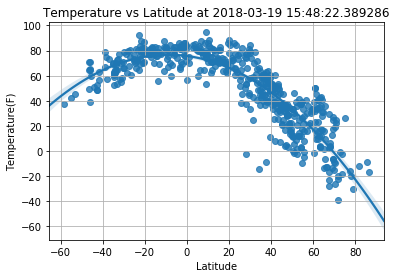

In [10]:
import seaborn
import matplotlib.pyplot as plt
import datetime
import time

plt.title("Temperature vs Latitude at " + str(datetime.datetime.now()))
plt.grid(True)
plt.gray()
seaborn.regplot(extractedweatherdata_df["Latitude"],extractedweatherdata_df["Temperature(F)"],order=2)
plt.savefig("tempvslat.png")
plt.show()

#### Now plot the humidity against latitude

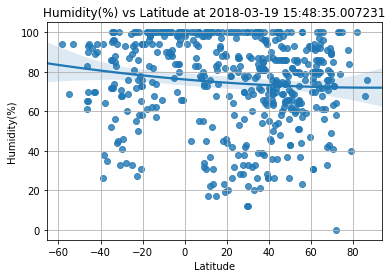

In [11]:
plt.title("Humidity(%) vs Latitude at " + str(datetime.datetime.now()))
plt.grid(True)
plt.gray()
seaborn.regplot(extractedweatherdata_df["Latitude"],extractedweatherdata_df["Humidity(%)"],order=2)
plt.savefig("humidityvslat.png")
plt.show()

#### Cloudiness against the latitude

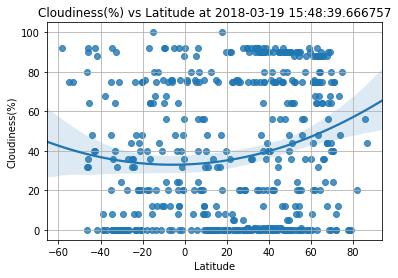

In [12]:
plt.title("Cloudiness(%) vs Latitude at " + str(datetime.datetime.now()))
plt.grid(True)
plt.gray()
seaborn.regplot(extractedweatherdata_df["Latitude"],extractedweatherdata_df["Cloudiness(%)"],order=2)
plt.savefig("cloudinessvslat.png")
plt.show()

#### Windspeed vs Latitude

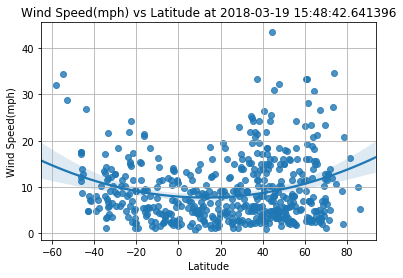

In [13]:
plt.title("Wind Speed(mph) vs Latitude at " + str(datetime.datetime.now()))
plt.grid(True)
plt.gray()
seaborn.regplot(extractedweatherdata_df["Latitude"],extractedweatherdata_df["Wind Speed(mph)"],order=2)
plt.savefig("windspeedvslat.png")
plt.show()

# Bonus - Plot the coordinates as a map to check

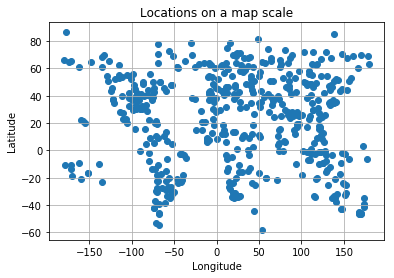

In [14]:
plt.title("Locations on a map scale")
plt.grid(True)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gray()
plt.scatter(extractedweatherdata_df["Longitude"],extractedweatherdata_df["Latitude"])
plt.show()

## ...and compare with world map outline

In [15]:
from IPython.display import Image
display(Image(url="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQqgXg8Hx-n11wV0ksoIJxXaVOTZ5jHjU7p5Js3xEKWsApMohKe"))